In [1]:
from numpy import array, zeros, pi, size, linspace
import numpy as np
import scipy
from scipy import integrate
from printSoln import *
from run_kut4 import *
from euler0 import *
import pylab as pl

# Question 1

### 1a) 
We convert this equation to two first-order equations by setting
z = dx/dt:

x′ = z

z′ = −x − E(x^2 − 1)z

### 1b) 

In [50]:
#Define the two first order equations and epsilon as E

E=10.

def f(t,y):
    f=zeros(2)
    f[0]=y[1]
    f[1]=-y[0]-E*(y[0]**2-1)*y[1]
    return f

def g(y,t):
    f=zeros(2)
    f[0]=y[1]
    f[1]=-y[0]-E*(y[0]**2-1)*y[1]
    return f

Note that (as discussed in class) we need two functions with different
order of arguments, one to use with the supplied RK4 solver,
one for the Python internal solver.

We then solve this system using the forward Euler method and
the in-build Python ODE integrator over the requested interval
and using the given initial conditions e.g. as follows:

In [51]:
#x = lower limit of the integral
#xstop = upper limit of the integral
#y = array of the initial conditions ( x(0)=0.5 & x'(0)=0 )
#freq = I dunno but it's usually 1 so just roll with it.

x = 0.0 # Start of integration
xStop = 10.*np.pi # End of integration
y = np.array([0.5,0]) # Initial value of {y}
freq = 1 # Printout frequency

In [52]:
#From here on it's the same method 3 times over with changing h values. All done with the euler0 code.
h1 = 0.02 # Step size

X1,Y1 = integrate0(f,x,y,xStop,h1)
#printSoln(X1,Y1,freq)

In [53]:
#We have the integral for x' but we need x so integrate again but just regularly as it's no longer an ODE and just a basic integral.
x1=linspace(0.0,xStop,size(X1))
z1=scipy.integrate.odeint(g,y,x1)

In [66]:
Yexact1=z1[:,0] #this just takes the first column of values of the matrix of answers (the first column is the value, second is the errors)
Yexact1=Yexact1.reshape(size(x1)) # make it the exact size of the amount of x values.

error1=abs((Y1[:,0]-Yexact1)) # Error is just the true value-the value given (both are arrays of numbers for the integral)

In [67]:
h2 = 0.005 # Step size

X2,Y2 = integrate0(f,x,y,xStop,h2)
#printSoln(X2,Y2,freq)

In [68]:
#We have the integral for x' but we need x so integrate again but just regularly as it's no longer an ODE and just a basic integral.
x2=linspace(0.0,xStop,size(X2))
z2=scipy.integrate.odeint(g,y,x2)

In [69]:
Yexact2=z2[:,0] #this just takes the first column of values of the matrix of answers (the first column is the value, second is the errors)
Yexact2=Yexact2.reshape(size(x2)) # make it the exact size of the amount of x values.

error2=abs((Y2[:,0]-Yexact2)) # Error is just the true value-the value given (both are arrays of numbers for the integral)

In [70]:
h3 = 0.001 # Step size

X3,Y3 = integrate0(f,x,y,xStop,h3)
#printSoln(X3,Y3,freq)

In [71]:
#We have the integral for x' but we need x so integrate again but just regularly as it's no longer an ODE and just a basic integral.
x3=linspace(0.0,xStop,size(X3))
z3=scipy.integrate.odeint(g,y,x3)

In [72]:
Yexact3=z3[:,0] #this just takes the first column of values of the matrix of answers (the first column is the value, second is the errors)
Yexact3=Yexact3.reshape(size(x3)) # make it the exact size of the amount of x values.

error3=abs((Y3[:,0]-Yexact3)) # Error is just the true value-the value given (both are arrays of numbers for the integral)

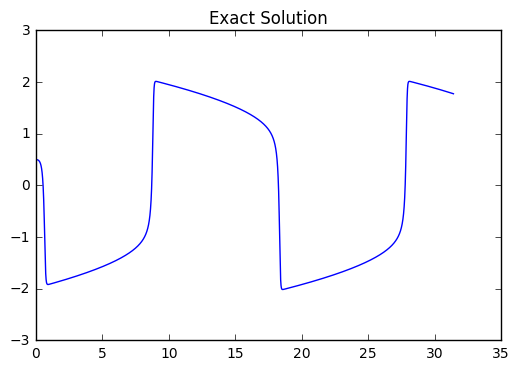

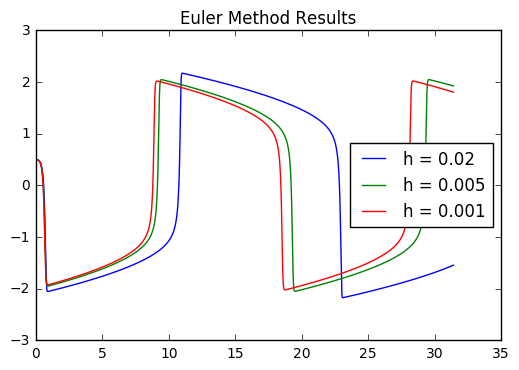

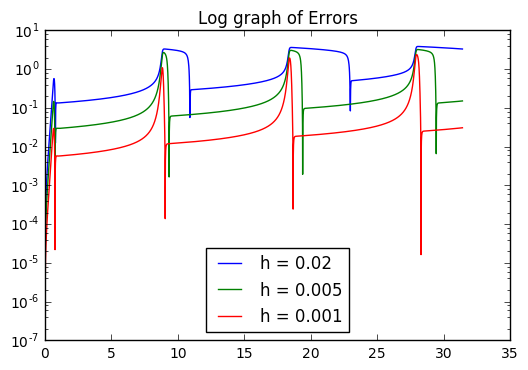

In [73]:
pl.title('Exact Solution')
pl.plot(X3,Yexact3)
pl.show()

pl.title('Euler Method Results')
pl.plot(X1,Y1[:,0], label='h = 0.02')
pl.plot(X2,Y2[:,0], label='h = 0.005')
pl.plot(X3,Y3[:,0], label='h = 0.001')
pl.legend(loc='best')
pl.show()

pl.clf()
pl.title('Log graph of Errors')
pl.semilogy(X1,error1, label='h = 0.02')
pl.semilogy(X2,error2, label='h = 0.005')
pl.semilogy(X3,error3, label='h = 0.001')
pl.legend(loc='best')
pl.show()

The large stepsize solution (green) is incorrect, with errors larger
than 100% (blue). The middle stepsize solution (red) is still significantly 
off, typically by at least 10% (green), and by up to
several hundred percent in some intervals, and also getting worse
over time. The finest-step solution (cyan) is relatively closer to
the ’exact’ solution (blue), albeit not ideal (off by 1% to few percent, red).

### 1c) 
Here we solve the same system using the forward Runge-Kutta
method of 4th order method:

In [35]:
h4 = 0.02 # Step size

X4,Y4 = integrate(f,x,y,xStop,h4)
#printSoln(X1,Y1,freq)

In [36]:
#We have the integral for x' but we need x so integrate again but just regularly as it's no longer an ODE and just a basic integral.
x4=np.linspace(0.0,xStop,size(X4))
z4=scipy.integrate.odeint(g,y,x4)

In [64]:
Yexact4=z4[:,0] # this just takes the first column of values of the matrix of answers (the first column is the value, second is the errors)
Yexact4=Yexact4.reshape(size(x4)) # make it the exact size of the amount of x values.

error4=abs((Y4[:,0]-Yexact4)) # Error is just the true value-the value given (both are arrays of numbers for the integral)

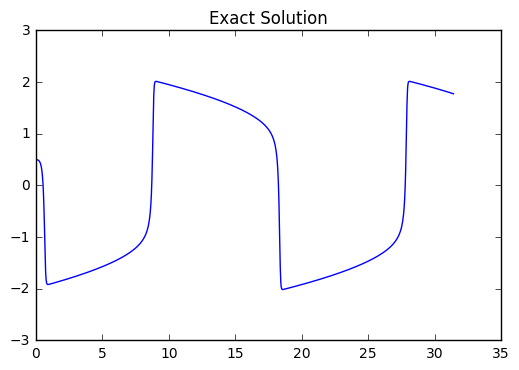

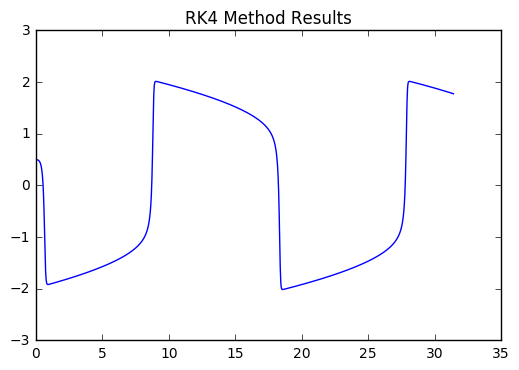

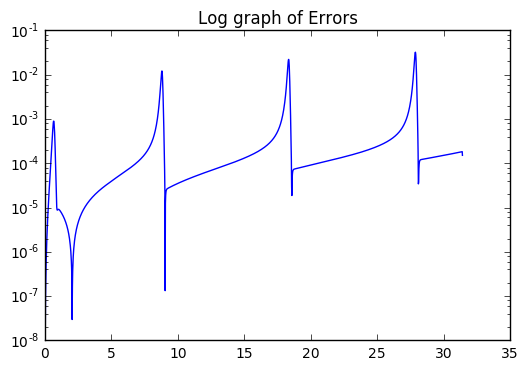

In [65]:
pl.title('Exact Solution')
pl.plot(X4,Yexact4)
pl.show()

pl.title('RK4 Method Results')
pl.plot(X4,Y4[:,0])
pl.show()

pl.clf()
pl.title('Log graph of Errors')
pl.semilogy(X4,error4)
pl.show()

Clearly, the solution is much better than what we found with the
Euler method (where the long step one did not even yield any
result), however the errors could still be substantial - up to 10−4
for the coarse steps, but typically less than 10−5 for the finer
timesteps. However, the errors do grow over time.

The implicit methods used for stiff equations are generally unconditionally
stable (but not necessarily very precise, which depends
on their order, instead).

# Question 2

In [39]:
#Define constants.
a= 1.0
b1= 1.8
b2= 2.02

In [40]:
#define the function for each part from the given functions.
def fa(x,y):
    f=zeros(2)            
    f[0]=(1-((1+b1)*x[0])+a*(x[0]**2.0)*x[1])  
    f[1]=(b1*x[0]-a*(x[0]**2)*x[1])
    return f

def fb(x,y):
    f=zeros(2)            
    f[0]=(1-((1+b2)*x[0])+a*(x[0]**2.0)*x[1])  
    f[1]=(b2*x[0]-a*(x[0]**2)*x[1])
    return f

In [41]:
#generate arrays of numbers for the range of values to be used and the intial conditions of the function.
x= np.linspace(0, 100, 5000)
y= array([0.0, 0.0])

In [42]:
#use scipy's inbuilt odeint function to solve the differential equation for both initial conditions.
za=scipy.integrate.odeint(fa,y,x)
zb=scipy.integrate.odeint(fb,y,x)

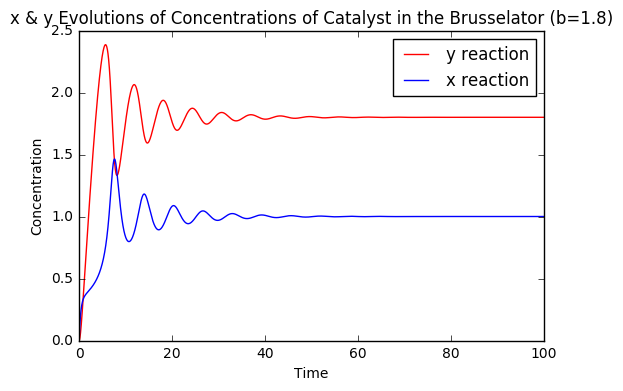

In [44]:
#plot each part of the question on different graphs.
pl.plot(x, za[:,1], label = 'y reaction',color ='red')  
pl.plot(x, za[:,0], label = 'x reaction', color ='blue')
pl.title('x & y Evolutions of Concentrations of Catalyst in the Brusselator (b=1.8)')
pl.xlabel('Time')
pl.ylabel('Concentration')
pl.legend(loc='best')
pl.show()

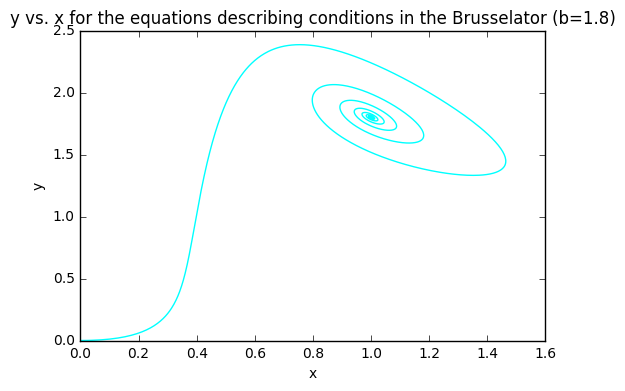

In [46]:
pl.plot(za[:,0], za[:,1], color ='aqua')  
pl.title('y vs. x for the equations describing conditions in the Brusselator (b=1.8)')
pl.xlabel('x')
pl.ylabel('y')
pl.show()

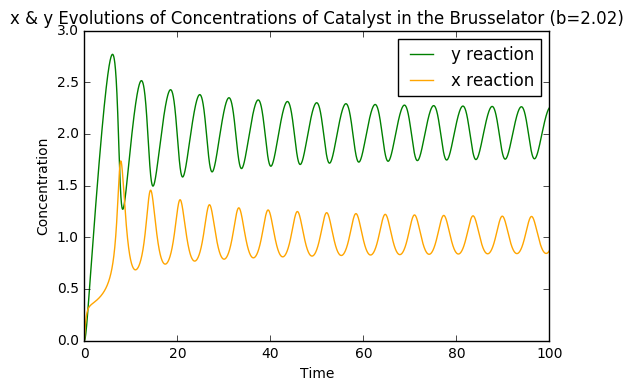

In [48]:
pl.plot(x, zb[:,1], label = 'y reaction',color ='green')  
pl.plot(x, zb[:,0], label = 'x reaction', color ='orange')
pl.title('x & y Evolutions of Concentrations of Catalyst in the Brusselator (b=2.02)')
pl.xlabel('Time')
pl.ylabel('Concentration')
pl.legend(loc='best')
pl.show()

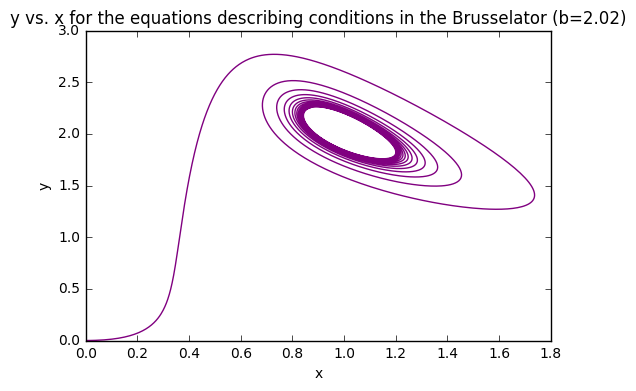

In [49]:
pl.plot(zb[:,0], zb[:,1], color ='purple')  
pl.title('y vs. x for the equations describing conditions in the Brusselator (b=2.02)')
pl.xlabel('x')
pl.ylabel('y')
pl.show()